In [1]:
import random
import numpy as np
import pandas as pd
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
with open('dpc-covid19-ita-province.json') as f:
    d = json.load(f)

In [3]:
def data_cleaning(ls):
    
    '''Funzione che ritorna una lista di dati puliti, nel caso in cui venga passata una lista di dizionari. La lista ritornata è
    composta da tre liste. Nell'ordine: una lista con i nomi delle città, una lista con le latitudini ed una con le longitudini,
    senza perdere la corrispondenza (i.e. in posizione i-esima di ogni lista ci sono i dettagli della città i-esima).'''

    posizioni = {} # creo anche un dizionario con il duplice scopo di accelerare i tempi di controllo quando faccio il while se una provincia è già stata memorizzata e per memorizzare le posizioni
    province = []
    lat = []
    long = []
    real = []
    i = 0
    while i < len(ls) and ls[i].get('sigla_provincia') not in posizioni: # faccio un while in modo che si fermi al primo doppione
        if ls[i].get('sigla_provincia') != '':
            province.append(ls[i].get('sigla_provincia'))
            lat.append(ls[i].get('lat'))
            long.append(ls[i].get('long'))
            posizioni[ls[i].get('sigla_provincia')] = (ls[i].get('long'), ls[i].get('lat'))
        i += 1
    real.append(province)
    real.append(lat)
    real.append(long)
    return real

In [4]:
def casual_data(n):
    
    '''Funzione che ritorna una lista di dati casuali di n città che hanno latitudine nell'intervallo [30,50] e longitudine in
    [10,20]. La lista ritornata è composta da tre liste. Nell'ordine: una lista con i nomi delle città, una lista con le 
    latitudini ed una con le longitudini, senza perdere la corrispondenza (i.e. in posizione i-esima di ogni lista ci sono i 
    dettagli della città i-esima).'''   
    
    casual = []
    nomi = list(range(n)) 
    lat = [30 + 20 * random.random() for _ in range(n)] # ci mette meno della list range
    long = [10 + 10 * random.random() for _ in range(n)] # idem
    casual.append(nomi)
    casual.append(lat)
    casual.append(long)
    dizionario = {}
    for i in range(n):
        dizionario[nomi[i]] = (long[i], lat[i])
    return casual

In [5]:
def graph(ls, distanza):
    
    '''Funzione che restituisce in tempo lineare un grafo quando le viene passata una lista di tre liste ed una distanza per
    impostare gli archi.
    La lista passata deve contenere, in ordine, una lista di nomi di città, una lista delle latitudini delle città ed una lista 
    delle longitudini delle città, ché siano corrispondenti uno ad uno (i.e. in posizione i-esima di ogni lista ci devono essere i 
    dettagli della città i-esima). Se si intende lavorare con il file json fornito dal dipartimento della Protezione Civile è
    sufficiente pulire i dati con la funzione `data_cleaning(ls)`; se altrimenti si vuole procedere con una simulazione è
    necessario ricorrere alla funzione `casual_data(n)`.
    I vertici sono rappresentati dalle città e si traccia un arco tra di essi se ciò che segue è verificato: sia (x,y) la
    posizione di a, allora b è in posizione (z,w), con z in [x-d, x+d] e w in [y-d, y+d], con d = distanza.'''
    
    lx = ls[:]
    long = lx.pop()
    lat = lx.pop()
    nomi = lx.pop()
    
    var_lat = np.var(lat)
    var_long = np.var(long)
    
    posizioni = {}
    G = nx.Graph()
    
    
    if var_lat > var_long:
        tuples = zip(*sorted(zip(lat, nomi, long)))
        lat, nomi, long = [list(tuple) for tuple in tuples]
        edges = []
        for i in range(len(nomi)):
            nome_i = nomi[i]
            G.add_node(nome_i, pos=(long[i], lat[i]), color=setColor(i, long))
            j = i + 1
            dist_lat = 0
            while dist_lat <= 0.08 and j < len(nomi): 
                dist_lat = lat[j] - lat[i] # non prendo il valore assoluto perché è un valore già positivo
                dist_long = abs(long[j] - long[i])
                nome_j = nomi[j]
                if dist_long <= 0.08:
                    edges.append((nome_i, nome_j))
                j += 1
    else:
        tuples = zip(*sorted(zip(long, nomi, lat)))
        long, nomi, lat = [list(tuple) for tuple in tuples]
        edges = []
        for i in range(len(nomi)):
            nome_i = nomi[i]
            G.add_node(nome_i, pos=(long[i], lat[i]), color=setColor(i, long))
            j = i + 1
            dist_long = 0
            while dist_long <= distanza and j < len(nomi):
                dist_long = long[j] - long[i] # non prendo il valore assoluto perché è un valore già positivo
                dist_lat = abs(lat[j] - lat[i])
                nome_j = nomi[j]
                if dist_lat <= distanza:
                    edges.append((nome_i, nome_j))
                j += 1
                
    G.add_edges_from(edges)            
    return G

In [6]:
def setColor(node, long):
    ma = max(long)
    mi = min(long)
    q = (ma - mi) / 3
    y = long[node]
    if y >= mi and y < mi + q:
        return 'green'
    if y >= mi + q and y <= mi + 2*q:
        return 'white'    
    if y >= mi + 2*q and y <= mi + 3*q:
        return 'red'

In [7]:
dati_reali = data_cleaning(d)
dati_casuali = casual_data(2000)

In [11]:
P = graph(dati_reali, 0.8)
R = graph(dati_casuali, 0.08)

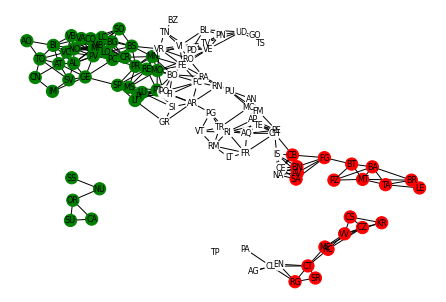

In [16]:
nx.draw(P, pos=nx.get_node_attributes(P, 'pos'), with_labels=True, node_size=150, font_size=8, node_color=nx.get_node_attributes(P, 'color').values())

In [10]:
eulerian_path(P)

NameError: name 'eulerian_path' is not defined

Implementare l'altro algoritmo e migliorare la funzione `is_bridge`

In [ ]:
def eulerian_path(G):
    
    CC = list(nx.connected_components(G))
    CC_count = 0
    for c in CC:
        if len(c) != 1:
            CC_count += 1
    if CC_count != 1:
        return 'This graph is not Eulerian.'
    
    edges = G.edges
    degree = G.degree    
    nodes = list(G.nodes)
    
    odd_degree_nodes = 0
    odd_list = []
    for anode in nodes:
        if degree[anode] % 2 != 0:
            odd_degree_nodes += 1
            odd_list.append(anode)
            
    edge_path = []
    if odd_degree_nodes == 2:
        next_node = odd_list[random.randint(0, len(odd_list)-1)]
        while edges:
            current_node = next_node
            edge_path.append(current_node)
            node_edges = list(edges(current_node))
            arandom = random.randint(0, len(node_edges)-1)
            edge = node_edges[arandom]
            if not is_bridge(edge, G):
                next_node = edge[1]
                G.remove_edge(*edge)
        edge_path.append(next_node)
        return edge_path
                
    elif odd_degree_nodes == 0:
        next_node = nodes[random.randint(0, len(nodes)-1)]
        while edges:
            current_node = next_node
            edge_path.append(current_node)
            node_edges = list(edges(current_node))
            arandom = random.randint(0, len(node_edges)-1)
            edge = node_edges[arandom]
            if not is_bridge(edge, G):
                next_node = edge[1]
                G.remove_edge(*edge)
        edge_path.append(next_node)
        return edge_path
    
    else:
        return 'This graph is not Eulerian.'
    
def is_bridge(edge, G):
    H = G.copy()
    H.remove_edge(*edge)
    new_CC = list(nx.connected_components(H))
    CC_count = 0
    for c in new_CC:
        if len(c) != 1:
            CC_count += 1
    if CC_count > 1:
        return True
    return False

In [19]:
def is_bridge(edge, G):
    H = G.copy()
    H.remove_edge(*edge)
    new_CC = list(nx.connected_components(H))
    CC_count = 0
    for c in new_CC:
        if len(c) != 1:
            CC_count += 1
    if CC_count > 1:
        return True
    return False

In [20]:
%%timeit

CC = list(nx.connected_components(P))
CC_count = 0
for c in CC:
    if len(c) != 1:
        CC_count += 1
edges = P.edges
degree = P.degree    
nodes = list(P.nodes)
odd_degree_nodes = 0
odd_list = []
for anode in nodes:
    if degree[anode] % 2 != 0:
        odd_degree_nodes += 1
        odd_list.append(anode)            
edge_path = []
if odd_degree_nodes == 2:
    next_node = odd_list[random.randint(0, len(odd_list)-1)]
    while edges:
        current_node = next_node
        edge_path.append(current_node)
        node_edges = edges(current_node)
        ls_node_edges = list(node_edges)
        arandom = random.randint(0, len(node_edges)-1)
        edge = ls_node_edges[arandom]
        if not is_bridge(edge, P):
            next_node = edge[1]
            P.remove_edge(*edge)
    edge_path.append(next_node)                
elif odd_degree_nodes == 0:
    next_node = nodes[random.randint(0, len(nodes)-1)]
    while edges:
        current_node = next_node
        edge_path.append(current_node)
        node_edges = edges(current_node)
        ls_node_edges = list(node_edges)
        arandom = random.randint(0, len(node_edges)-1)
        edge = ls_node_edges[arandom]
        if not is_bridge(edge, P):
            next_node = edge[1]
            P.remove_edge(*edge)
    edge_path.append(next_node)

479 µs ± 43.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [21]:
def degree_distribution(G):
    degree = dict(G.degree)
    L = list(degree.values())
    V = {adegree: None for adegree in L} # faccio un vocabolario in modo da eliminare tutti i doppioni (mi costa O(n))
    k = [adegree for adegree in V] # riconverto tutto in lista
    k.sort() # O(n*log(n))
    n = len(degree)
    freq = [0]*(max(k)+1)
    for i in L:
        freq[i] = freq[i] + 1
    distr_dict = {}
    for i in k: # devo per forza utilizzare k nel caso in cui ci fossero dei buchi
        distr_dict[i] = freq[i] / n
    return distr_dict

def Pr(k, G):
    return degree_distribution(G).get(k)

In [23]:
def power_law(G):
    degree = dict(G.degree)
    pl = {}
    for anode in degree:
        pl[anode] = 1 / 

SyntaxError: invalid syntax (<ipython-input-23-13f536ce871e>, line 5)

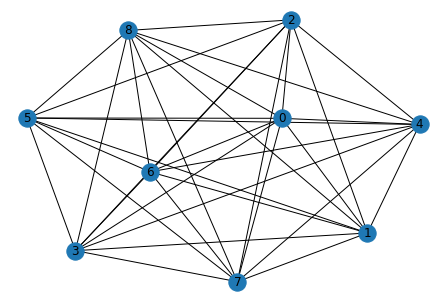

In [26]:
K = nx.complete_graph(9)
nx.draw(K, with_labels=True)

In [27]:
eulerian_path(K)

[1,
 0,
 5,
 3,
 1,
 7,
 2,
 0,
 4,
 1,
 5,
 7,
 8,
 1,
 6,
 7,
 3,
 8,
 4,
 6,
 5,
 4,
 3,
 0,
 7,
 4,
 2,
 3,
 6,
 2,
 5,
 8,
 6,
 0,
 8,
 2,
 1]

In [98]:
for anode in dict(P.degree):
    print(anode[2])

IndexError: string index out of range

In [90]:
degree_distribution(R)

{0: 0.7565, 1: 0.2095, 2: 0.0305, 3: 0.0035}

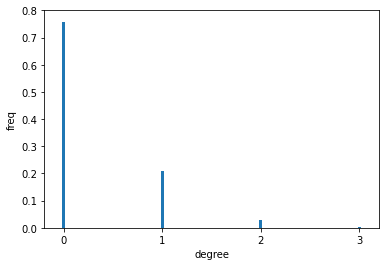

In [89]:
x = list(degree_distribution(R).keys())
y = list(degree_distribution(R).values())
plt.axis([-0.2, 3.2, 0, 0.8])
plt.xlabel('degree')
plt.xticks(x)
plt.ylabel('freq')
plt.bar(x, y, width=0.03);

### Eulerian circuit, Wikipedia

An undirected graph has an Eulerian cycle if and only if every vertex has even degree, and all of its vertices with nonzero degree belong to a single connected component.
> An undirected graph can be decomposed into edge-disjoint cycles if and only if all of its vertices have even degree. So, a graph has an Eulerian cycle if and only if it can be decomposed into edge-disjoint cycles and its nonzero-degree vertices belong to a single connected component.

An undirected graph has an Eulerian trail if and only if exactly zero or two vertices have odd degree, and all of its vertices with nonzero degree belong to a single connected component.


### Eulerian path, networkx doc
exactly zero or two vertices have odd degree,

and all of its vertices with nonzero degree belong to a

single connected component.

Questo sotto serve per ritrovare le calcolare il tempo

In [37]:
%%timeit
n = 2000
# utilizzo le liste perché coi dizionari potrei incappare in sovrapposizione di hash
nomi = list(range(n)) 
lat = [30 + 20 * random.random() for _ in range(n)] # ci mette meno della list range
long = [10 + 10 * random.random() for _ in range(n)] # idem

var_lat = np.var(lat)
var_long = np.var(long)

if var_lat > var_long:
    tuples = zip(*sorted(zip(lat, nomi, long)))
    lat, nomi, long = [list(tuple) for tuple in tuples]
    edges = []
    pos = {}
    for i in range(n):
        nome_i = nomi[i]
        pos[nome_i] = (long[i], lat[i])
        j = i + 1
        dist_lat = 0
        while dist_lat <= 0.08 and j < n: 
            dist_lat = lat[j] - lat[i] # non prendo il valore assoluto perché è un valore già positivo
            dist_long = abs(long[j] - long[i])
            nome_j = nomi[j]
            if dist_long <= 0.08:
                edges.append((nome_i, nome_j))
            j += 1
else:
    tuples = zip(*sorted(zip(long, nomi, lat)))
    long, nomi, lat = [list(tuple) for tuple in tuples]
    edges = []
    pos = {}
    for i in range(n):
        nome_i = nomi[i]
        pos[nome_i] = (long[i], lat[i])
        j = i + 1
        dist_long = 0
        while dist_long <= 0.08 and j < n:
            dist_long = long[j] - long[i] # non prendo il valore assoluto perché è un valore già positivo
            dist_lat = abs(lat[j] - lat[i])
            nome_j = nomi[j]
            if dist_lat <= 0.08:
                edges.append((nome_i, nome_j))
            j += 1

15.8 ms ± 343 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


##### Coi dizionari (ma ci mette un poco di più)

%%timeit
n = 2000
sigle_province = {}
for i in range(n):
    sigle_province[i] = (30 + 20 * random.random(), 10 + 10 * random.random())
sigle_province = sorted(sigle_province.items(), key=lambda kv: kv[1][0])
edges = []
for i in range(n):
    nome_i = sigle_province[i][0]
    j = i + 1
    dist_lat = 0
    while dist_lat <= 0.08 and j < n: 
        dist_lat = sigle_province[j][1][0] - sigle_province[i][1][0] # non prendo il valore assoluto perché è un valore già positivo
        dist_long = abs(sigle_province[j][1][1] - sigle_province[i][1][1])
        nome_j = sigle_province[j][0]
        if dist_long <= 0.08:
            edges.append((nome_i, nome_j))
        j += 1

##### metodo mattia
dist = 0.08
    # df è un dizionario, es: {'PT': (long, lat), 'LU': (long, lat),...}
    # dist = 0.8

id_node = list(sigle_province.keys())
x_node = [row[0] for row in sigle_province.values()]
y_node = [row[1] for row in sigle_province.values()]

x_node, y_node, id_node = zip(*sorted(zip(x_node, y_node, id_node)))
edges = []
for i in range(len(x_node)-1):
    j = 1
    while (i+j) < len(x_node) and (x_node[i+j]-x_node[i]) <= dist:
        if abs(y_node[i+j]-y_node[i]) <= dist:
            edges.append((id_node[i], id_node[i+j]))
        j += 1

##### Utilizzando array di Numpy
n = 2000
nomi = np.arange(n)
lat = np.random.rand(n)
lat = 30 + 20 * lat 
long = np.random.rand(n)
long = 10 + 10 * long
ind = np.argsort(lat)
lat = np.sort(lat)
edges = []
for i in range(n-1):
    nome_i = nomi[ind][i]
    j = i + 1
    dist_x = 0
    while dist_x <= 0.08 and j < n:
        dist_x = lat[j] - lat[i]
        dist_y = abs(long[ind][j] - long[ind][i])
        nome_j = nomi[ind][j]
        if dist_y <= 0.08:
            edges.append((nome_i, nome_j))
        j += 1

##### Utilizzando i DataFrame
n = 2000
cities = []
for i in range(n):
    cities_dict = {}
    cities_dict['city_number'] = i
    cities_dict['lat'] = 30 + 20 * random.random()
    cities_dict['long'] = 10 + 10 * random.random()
    cities.append(cities_dict)
df_cities = pd.DataFrame(cities)
df_cities = df_cities.set_index('city_number')
df_cities = df_cities.sort_values('long', kind='mergesort')
edges = []
for i in range(n):
    nome_i = df_cities.index[i]
    j = i + 1
    dist_x = 0
    while dist_x <= 0.08 and j < n:
        dist_x = df_cities['lat'].iloc[j] - df_cities['lat'].iloc[i]
        dist_y = np.absolute(df_cities['long'].iloc[j] - df_cities['long'].iloc[i])
        nome_j = df_cities.index[j]
        if dist_y <= 0.08:
            edges.append((nome_i, nome_j))
        j += 1

##### Utilizzando un metodo che ci mette O(n^2)
n = 2000
l = []
for i in range(n):
    e = 30 + 20 * random.random()
    f = 10 + 10 * random.random()
    v = {}
    v["numero_provincia"] = i
    v["lat"] = e
    v["long"] = f
    l.append(v)
ed = []
for i in range(len(l)):
    a = l[i].get("numero_provincia")
    x = l[i].get("lat")
    y = l[i].get("long")
    for j in range(i + 1, len(l)):
        b = l[j].get("numero_provincia")
        z = l[j].get("lat")
        w = l[j].get("long")
        if abs(x-z) <= 0.08 and abs(y-w) <= 0.08 and a != b:
            ed.append((a,b))